#### 本课程设计两类模型

#### 当 N = 1 时，使用 unified structural equation model（uSEM）

#### 当 N = all 时，使用 multievel vector autoregression model

In [4]:
#  载入数据库
library(psych) # 描述分析
library(plyr)  # 数据整理
library(ggplot2) # 可视化
library(pompom) # uSEM 建模
library(mlVAR) # mlVAR 建模

Warning message:
"程辑包'mlVAR'是用R版本4.2.3 来建造的"


#### 载入数据

一组 30 个被试，每天报告8次，连续报告21天，形成了这样一个时间序列数据（1个人有超过100次obs），载入下面数据：

In [26]:
filepath <- "https://quantdev.ssri.psu.edu/sites/qdev/files/AMIBshare_phase2_interaction_2019_0501.csv"

AMIB_interactionP2 <- read.csv(file=url(filepath),header=TRUE)

#### 这21天的测量包含6个关键感兴趣的变量：

人际吸引力（interpersonal affection，“igaff”）

人际地位（interpersonal dominance，“igdom”）

情绪效价（affect valence，“agval”）

情绪唤醒程度（affect arousal，“agarous”）

压力（stress，”stress“）

健康（health，”health"）

In [28]:
#s 我们仅把感兴趣的变量提取出来
AMIB_interactionP2 <- AMIB_interactionP2[ ,c("id","day","interaction",
                                             "igaff","igdom",
                                             "agval", "agarous", 
                                             "stress", "health")]
head(AMIB_interactionP2)
describe(AMIB_interactionP2)

,id,day,interaction,igaff,igdom,agval,agarous,stress,health
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,203,1,1,9,8,9,8,0,0
2,203,1,2,7,8,9,6,0,0
3,203,1,3,8,8,9,8,0,0
4,203,1,4,9,8,9,8,0,0
5,203,1,5,8,8,8,8,0,0
6,203,2,6,9,9,9,9,0,1


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,4200,310.363810,77.119508,321,308.400298,121.5732,203,439,236,0.07454841,-1.212313267,1.18997984
day,2,4200,10.570714,5.987424,10,10.495238,7.4130,1,21,20,0.09407762,-1.163276968,0.09238796
interaction,3,4200,73.884048,45.183178,71,72.316964,54.8562,1,168,167,0.23187029,-1.002517539,0.69719157
igaff,4,4190,7.391169,1.782375,8,7.694809,1.4826,1,9,8,-1.43481679,2.006018457,0.02753545
igdom,5,4190,6.915752,1.617504,7,7.084129,1.4826,1,9,8,-0.92867494,0.906719824,0.02498839
agval,6,4189,6.797684,2.086323,7,7.079481,2.2239,1,9,8,-0.93409704,0.134382323,0.03223490
agarous,7,4189,5.915254,2.109067,6,6.039815,2.9652,1,9,8,-0.51396413,-0.564101693,0.03258632
stress,8,4191,1.220950,1.381207,1,1.017000,1.4826,0,5,5,0.96696607,0.018512748,0.02133536
health,9,4192,1.079198,1.173324,1,0.927251,1.4826,0,5,5,0.88299394,-0.004833679,0.01812205


# 使用 unified Structural Equation Model (uSEM)

uSEM 针对个体分别建模，一个人建立一个模型

In [29]:
# 选择一个人的数据
data_indiv <- AMIB_interactionP2[AMIB_interactionP2$id == 203, ]
head(data_indiv)
describe(data_indiv)

,id,day,interaction,igaff,igdom,agval,agarous,stress,health
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,203,1,1,9,8,9,8,0,0
2,203,1,2,7,8,9,6,0,0
3,203,1,3,8,8,9,8,0,0
4,203,1,4,9,8,9,8,0,0
5,203,1,5,8,8,8,8,0,0
6,203,2,6,9,9,9,9,0,1


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,111,203.0000000,0.0000000,203,203.00000000,0.0000,203,203,0,NaN,NaN,0.00000000
day,2,111,10.3873874,5.9362847,10,10.24719101,7.4130,1,21,20,0.1866305,-1.1543443,0.56344721
interaction,3,111,56.0000000,32.1869539,56,56.00000000,41.5128,1,111,110,0.0000000,-1.2324777,3.05505046
igaff,4,111,8.1306306,0.5296299,8,8.14606742,0.0000,7,9,2,0.1082672,0.2130838,0.05027024
igdom,5,111,7.9639640,0.4801123,8,7.97752809,0.0000,6,9,3,-0.5294252,3.1021820,0.04557024
agval,6,111,8.1306306,0.5253212,8,8.14044944,0.0000,7,9,2,0.1231301,0.2989595,0.04986128
agarous,7,111,7.9054054,0.4744064,8,7.93820225,0.0000,6,9,3,-0.6965747,2.8205576,0.04502866
stress,8,111,0.1531532,0.4898645,0,0.01123596,0.0000,0,3,3,3.5616516,13.3886660,0.04649588
health,9,111,0.2342342,0.6023432,0,0.08988764,0.0000,0,3,3,3.0723340,10.0511711,0.05717189


#### 个体的不同变量，量纲有很大的差异，因此我们要对数据做标准化

In [30]:
# 对数据集中所有变量做中心化处理
data_indiv[c(4:9)] <- lapply(data_indiv[c(4:9)], 
                             function(x) c(scale(x, center=TRUE, scale=TRUE)))
describe(data_indiv)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,111,2.030000e+02,0.000000,203.00000000,203.00000000,0.0000,203.0000000,203.000000,0.000000,NaN,NaN,0.0000000
day,2,111,1.038739e+01,5.936285,10.00000000,10.24719101,7.4130,1.0000000,21.000000,20.000000,0.1866305,-1.1543443,0.5634472
interaction,3,111,5.600000e+01,32.186954,56.00000000,56.00000000,41.5128,1.0000000,111.000000,110.000000,0.0000000,-1.2324777,3.0550505
igaff,4,111,4.400637e-16,1.000000,-0.24664514,0.02914637,0.0000,-2.1347562,1.641466,3.776222,0.1082672,0.2130838,0.0949158
igdom,5,111,-7.758779e-16,1.000000,0.07505752,0.02825199,0.0000,-4.0906349,2.157904,6.248539,-0.5294252,3.1021820,0.0949158
agval,6,111,4.391803e-16,1.000000,-0.24866813,0.01869106,0.0000,-2.1522655,1.654929,3.807195,0.1231301,0.2989595,0.0949158
agarous,7,111,3.032054e-16,1.000000,0.19939570,0.06913238,0.0000,-4.0163991,2.307293,6.323692,-0.6965747,2.8205576,0.0949158
stress,8,111,3.859223e-17,1.000000,-0.31264390,-0.28970704,0.0000,-0.3126439,5.811498,6.124142,3.5616516,13.3886660,0.0949158
health,9,111,1.795283e-17,1.000000,-0.38887170,-0.23964176,0.0000,-0.3888717,4.591677,4.980549,3.0723340,10.0511711,0.0949158


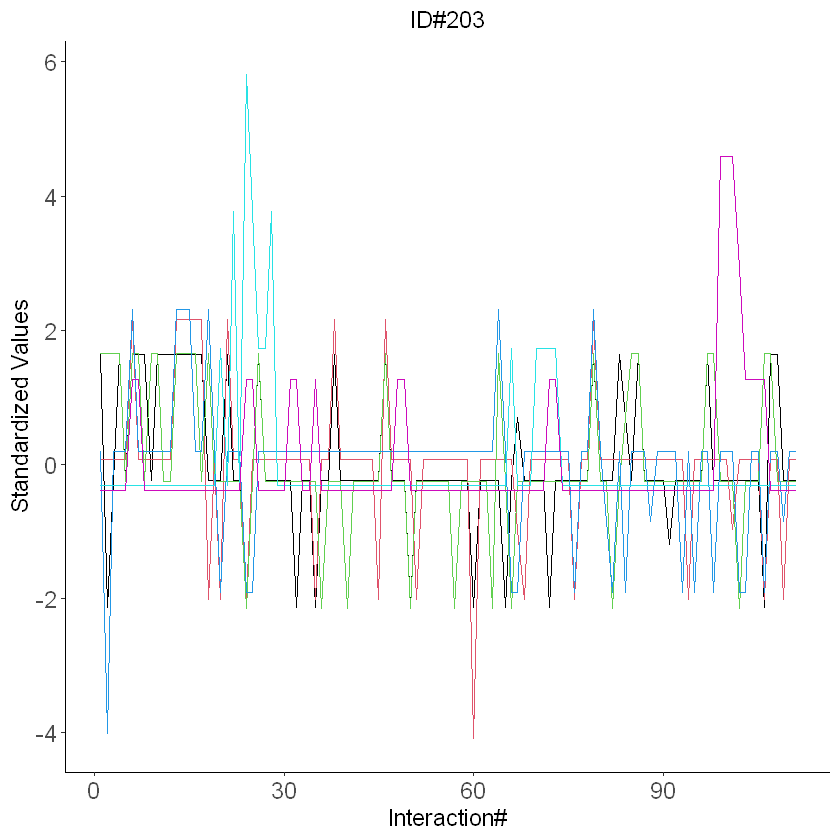

In [31]:
#plotting intraindividual change 
ggplot(data = data_indiv,
       aes(x = interaction, group= id)) +
  #first variable
  geom_line(aes(y=igaff), color=1) +
  geom_line(aes(y=igdom), color=2) +
  geom_line(aes(y=agval), color=3) +
  geom_line(aes(y=agarous), color=4) +
  geom_line(aes(y=stress), color=5) +
  geom_line(aes(y=health), color=6) +
  #plot layouts
  scale_x_continuous(name="Interaction#") +
  scale_y_continuous(name="Standardized Values") +  
  theme_classic() +
  theme(axis.title=element_text(size=14),
        axis.text=element_text(size=14),
        plot.title=element_text(size=14, hjust=.5)) +
  ggtitle("ID#203")

#### 拟合uSEM model，使用pompom函数库 中的 uSEM()

In [12]:
usem_indiv <- uSEM(var.number = 6, 
               data = data_indiv[ ,c(4:9)], 
               lag.order = 1, 
               verbose = FALSE,
               trim = FALSE)

Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta4~0*eta4"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta5~0*eta5"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta6~0*eta6"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):

In [13]:
ms_indiv <- model_summary(model.fit = usem_indiv,
                          var.number = 6, 
                          lag.order = 1)

ms_indiv

0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0
0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0
0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0
0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0
0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0
0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0
0.2178887,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0,0,0
0.0000000,-0.0623992,0.0000000,0.1902141,0.0000000,0.0000000,0.5657580,0,0,0,0,0
0.0000000,0.0000000,0.2048157,0.0000000,0.0000000,0.0000000,0.3759418,0,0,0,0,0
0.0000000,0.0000000,0.0000000,0.1843832,0.0000000,0.0000000,0.3459819,0,0,0,0,0
0.0000000,0.0000000,0.0000000,0.0000000,0.4339714,0.0000000,-0.1891716,0,0,0,0,0


#### 检查是否拟合良好

In [14]:
#check for good fit
print(sum(ms_indiv$cfi > .95, 
      ms_indiv$tli > .95,
      ms_indiv$rmsea < .08,
      ms_indiv$srmr < .08) >= 3)

[1] TRUE


#### 可视化 uSEM model

NULL

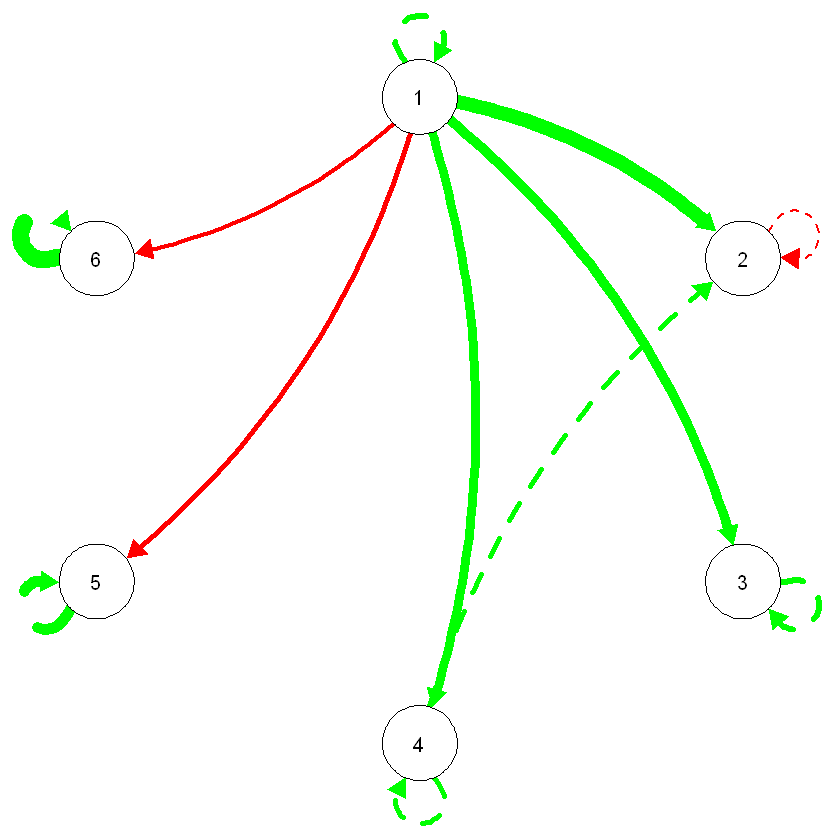

In [15]:
# 绘制网络图
plot_network_graph(ms_indiv$beta, var.number = 6)

In [16]:
#compute recovery time for all nodes
recovery_time <- iRAM(model.fit = usem_indiv, 
     beta = ms_indiv$beta,
     var.number = 6,
     lag.order = 1, 
     threshold = 0.01, 
     boot = TRUE,
     replication = 200, steps = 100)

#examine mean across the recovery time of all node-pairs
recovery_time$mean

4.545,4.665,4.815,4.625,5.66,9.240
0.000,3.275,0.000,0.000,0.00,0.000
0.000,0.000,4.440,0.000,0.00,0.000
0.000,4.015,0.000,4.195,0.00,0.000
0.000,0.000,0.000,0.000,7.14,0.000
0.000,0.000,0.000,0.000,0.00,14.455


Warning message:
"Removed 16000 rows containing missing values (`geom_line()`)."


NULL

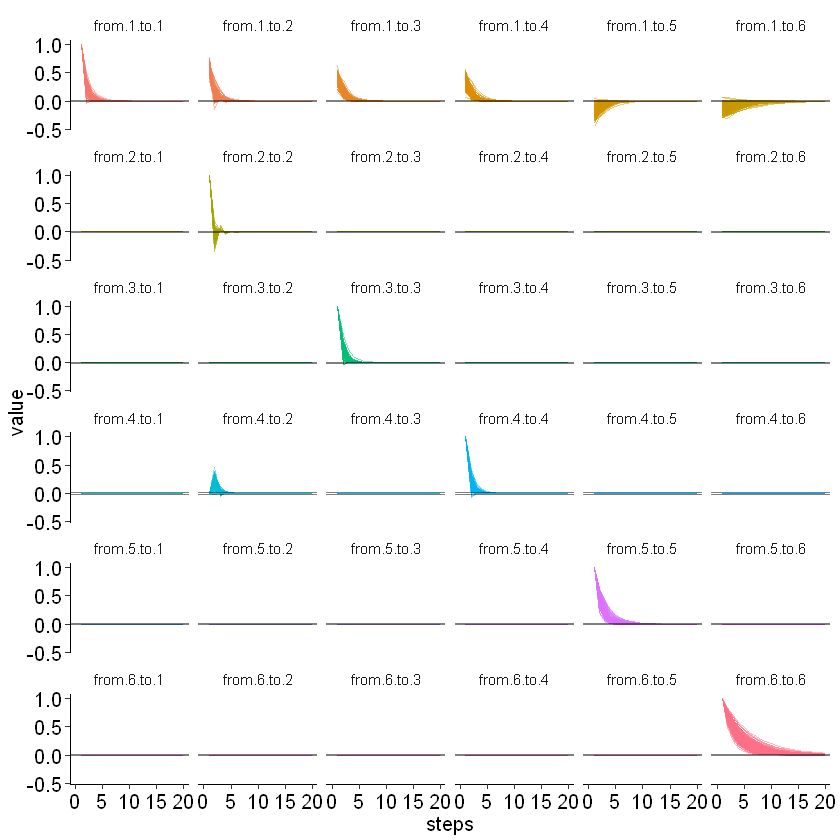

In [17]:
plot_time_profile(recovery_time$time.profile.data, 
                  var.number = 6,
                  threshold = 0.01,
                  xupper = 20)

[1] 203


Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta4~0*eta4"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta5~0*eta5"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta6~0*eta6"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):

[1] TRUE
[1] 204


Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta4~0*eta4"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta5~0*eta5"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta6~0*eta6"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):

[1] TRUE
[1] 205


Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta4~0*eta4"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta5~0*eta5"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta6~0*eta6"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):

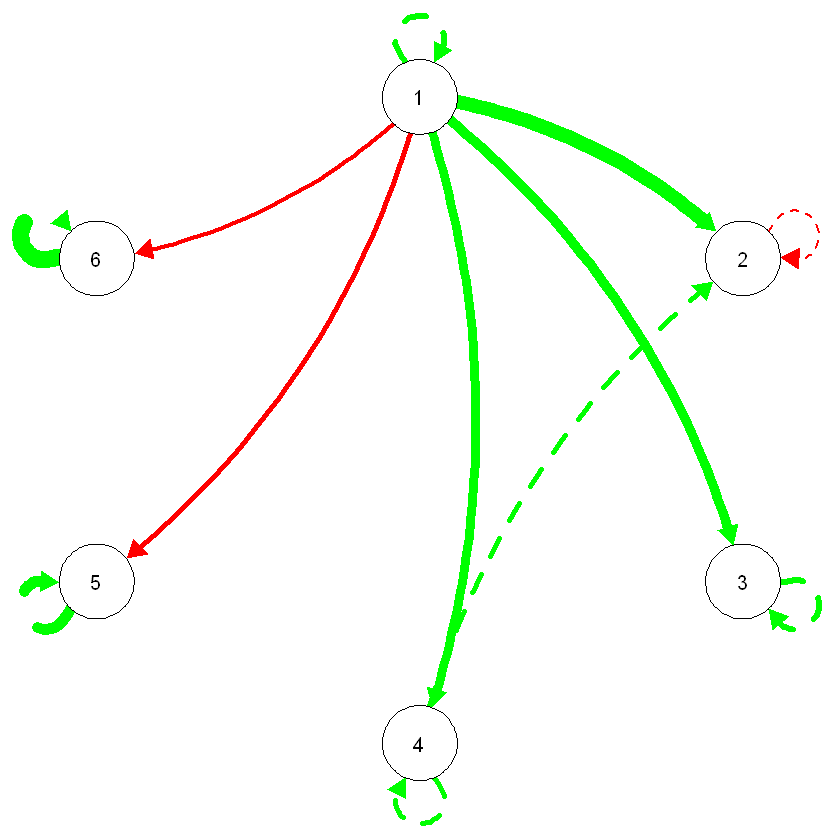

[1] TRUE
[1] 208


Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta4~0*eta4"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta5~0*eta5"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta6~0*eta6"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):

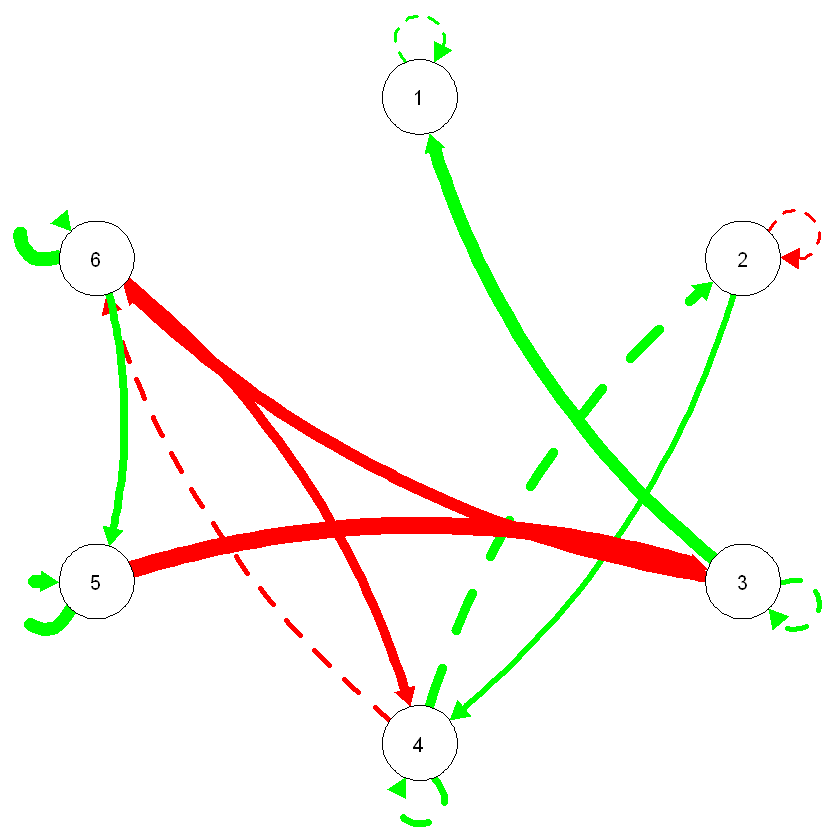

[1] TRUE
[1] 211


Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta4~0*eta4"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta5~0*eta5"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta6~0*eta6"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta1~0*eta1"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta2~0*eta2"
Warning message in lavParseModelString(model):
"lavaan WARNING: lhs and rhs are the same in: eta3~0*eta3"
Warning message in lavParseModelString(model):

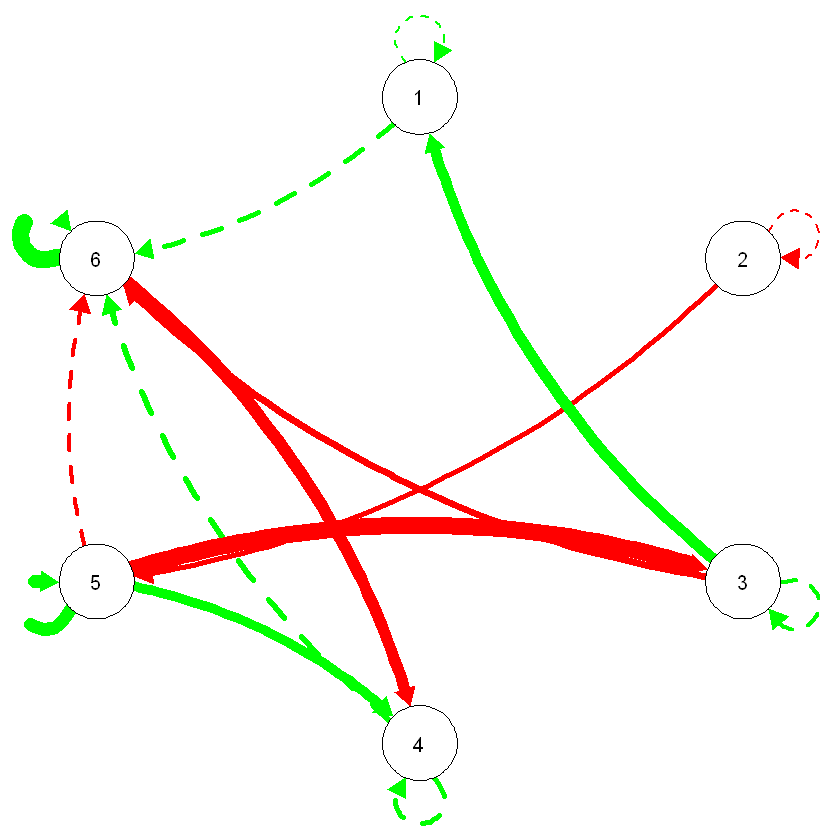

[1] TRUE


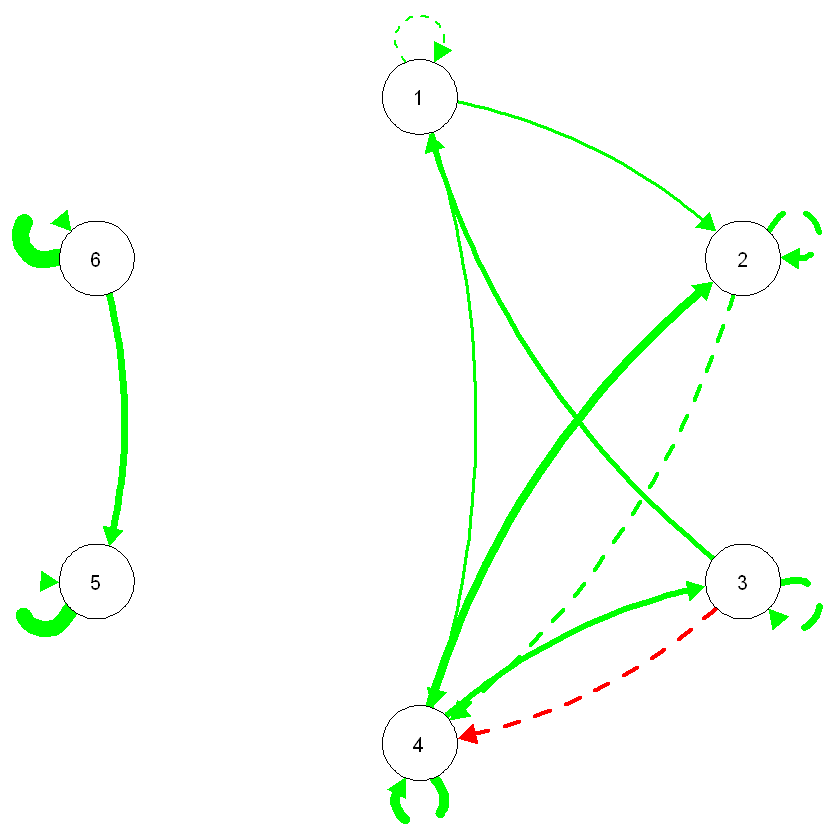

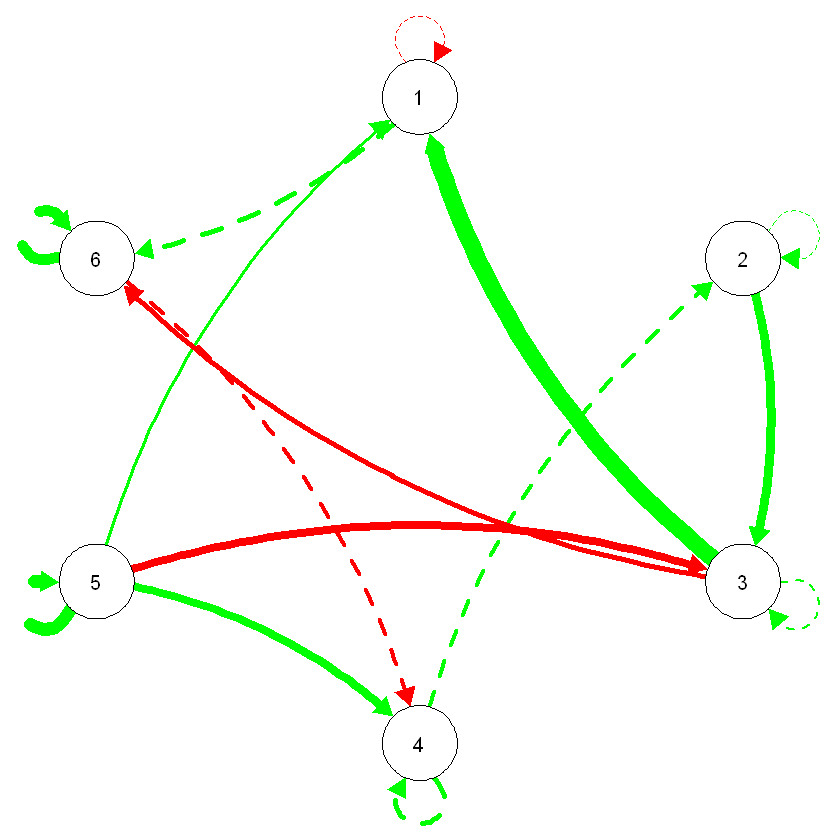

In [18]:
#create list of ids
id_list <- unique(AMIB_interactionP2$id)

for (id in id_list[1:5]) # select the first 5 participants as examples
{
  #select data for individual
  data_indiv <- AMIB_interactionP2[AMIB_interactionP2$id == id,]
  #standardize data for individual
  data_indiv[c(4:9)] <- lapply(data_indiv[c(4:9)], 
                             function(x) c(scale(x, center=TRUE, scale=TRUE)))
  #indicate id
  print(id)
  
  # check column missing
  na.col <- 0
  for (col in 1:ncol(data_indiv))
  {
    if (sum(is.na(data_indiv[,col])) == nrow(data_indiv)){
          na.col <- na.col + 1
    }
  }
  #fit uSEM model
  if (na.col == 0) # no NA column
  {
      usem_indiv <- uSEM(var.number = 6, 
                   data = data_indiv[ ,c(4:9)], 
                   lag.order = 1, 
                   verbose = FALSE,
                   trim = FALSE)
  
     ms_indiv <- model_summary(
       model.fit = usem_indiv,
       var.number = 6, 
       lag.order = 1)
     
     print(sum(ms_indiv$cfi > .95, 
           ms_indiv$tli > .95,
           ms_indiv$rmsea < .08,
           ms_indiv$srmr < .08) >= 3)

     plot_network_graph(ms_indiv$beta, var.number = 6)
  }
}

# multilevel vector-autoregression (mlVAR)

In [19]:
describe(AMIB_interactionP2)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,4200,310.363810,77.119508,321,308.400298,121.5732,203,439,236,0.07454841,-1.212313267,1.18997984
day,2,4200,10.570714,5.987424,10,10.495238,7.4130,1,21,20,0.09407762,-1.163276968,0.09238796
interaction,3,4200,73.884048,45.183178,71,72.316964,54.8562,1,168,167,0.23187029,-1.002517539,0.69719157
igaff,4,4190,7.391169,1.782375,8,7.694809,1.4826,1,9,8,-1.43481679,2.006018457,0.02753545
igdom,5,4190,6.915752,1.617504,7,7.084129,1.4826,1,9,8,-0.92867494,0.906719824,0.02498839
agval,6,4189,6.797684,2.086323,7,7.079481,2.2239,1,9,8,-0.93409704,0.134382323,0.03223490
agarous,7,4189,5.915254,2.109067,6,6.039815,2.9652,1,9,8,-0.51396413,-0.564101693,0.03258632
stress,8,4191,1.220950,1.381207,1,1.017000,1.4826,0,5,5,0.96696607,0.018512748,0.02133536
health,9,4192,1.079198,1.173324,1,0.927251,1.4826,0,5,5,0.88299394,-0.004833679,0.01812205


#### Plotting six-variate time-series for all persons

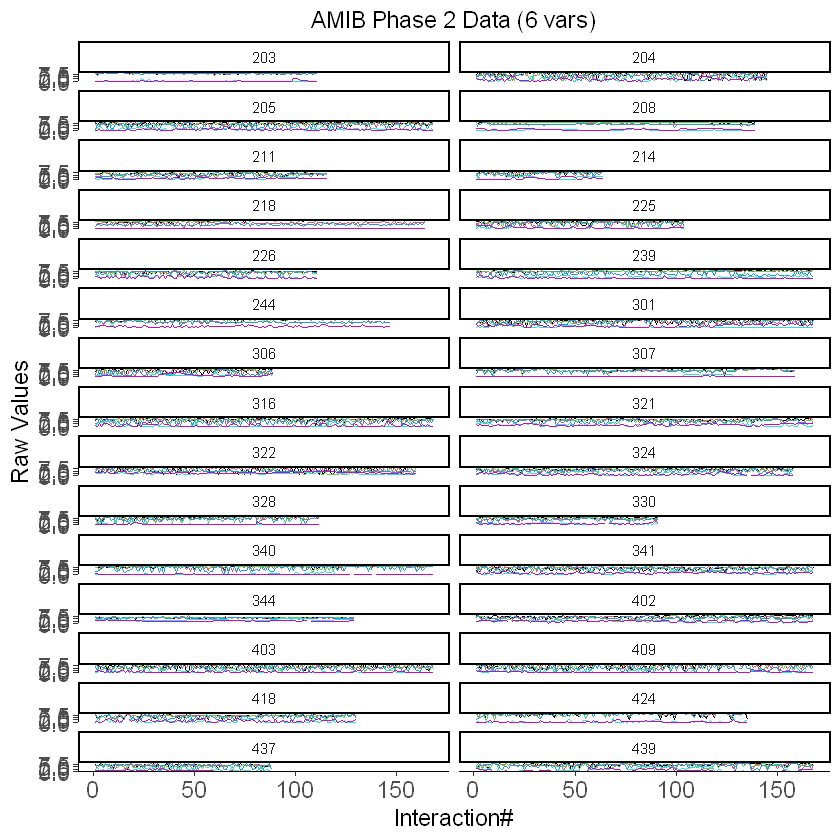

In [20]:
#plotting intraindividual change 
ggplot(data = AMIB_interactionP2,
       aes(x = interaction, group= id)) +
  #first variable
  geom_line(aes(y=igaff), color=1) +
  geom_line(aes(y=igdom), color=2) +
  geom_line(aes(y=agval), color=3) +
  geom_line(aes(y=agarous), color=4) +
  geom_line(aes(y=stress), color=5) +
  geom_line(aes(y=health), color=6) +
  #plot layouts
  scale_x_continuous(name="Interaction#") +
  scale_y_continuous(name="Raw Values") +  
  theme_classic() +
  theme(axis.title=element_text(size=14),
        axis.text=element_text(size=14),
        plot.title=element_text(size=14, hjust=.5)) +
  facet_wrap(~id, ncol=2) +
  ggtitle("AMIB Phase 2 Data (6 vars)")

#### 拟合Fitting the mlVAR model

In [21]:
#fitting mlVAR model
mlvar_all <- mlVAR(data = AMIB_interactionP2, 
                     vars = c("igaff", "igdom", "agval", "agarous", "stress", "health"),
                     idvar = "id",
                     lags = 1, 
                     dayvar = "day", 
                     beepvar = "interaction")

'estimator' argument set to 'lmer'

'temporal' argument set to 'correlated'

'contemporaneous' argument set to 'correlated'

Estimating temporal and between-subjects effects



  |======================================================================| 100%


Estimating contemporaneous effects



  |======================================================================| 100%


Computing random effects



  |======================================================================| 100%


In [22]:
# Summary of all parameter estimates:
summary(mlvar_all)


mlVAR estimation completed. Input was:
 	- Variables: igaff igdom agval agarous stress health 
 	- Lags: 1 
 	- Estimator: lmer 
 	- Temporal: correlated

Information indices:
     var      aic      bic
   igaff 9539.195 9792.416
   igdom 9603.567 9856.787
   agval 8805.919 9059.140
 agarous 8843.984 9097.204
  stress 6603.003 6856.223
  health 5759.345 6012.565


Temporal effects:
    from      to lag  fixed    SE     P ran_SD
   igaff   igaff   1  0.050 0.027 0.070  0.097
   igaff   igdom   1 -0.019 0.023 0.417  0.060
   igaff   agval   1 -0.009 0.020 0.658  0.043
   igaff agarous   1 -0.039 0.018 0.032  0.026
   igaff  stress   1  0.017 0.020 0.396  0.077
   igaff  health   1  0.027 0.014 0.049  0.037
   igdom   igaff   1 -0.025 0.018 0.181  0.027
   igdom   igdom   1  0.034 0.026 0.192  0.096
   igdom   agval   1 -0.036 0.016 0.025  0.017
   igdom agarous   1  0.035 0.017 0.040  0.034
   igdom  stress   1  0.026 0.012 0.032  0.017
   igdom  health   1  0.006 0.012 0.595  0.028
   

#### Plot the group-level networks for within-person and between-person relations.

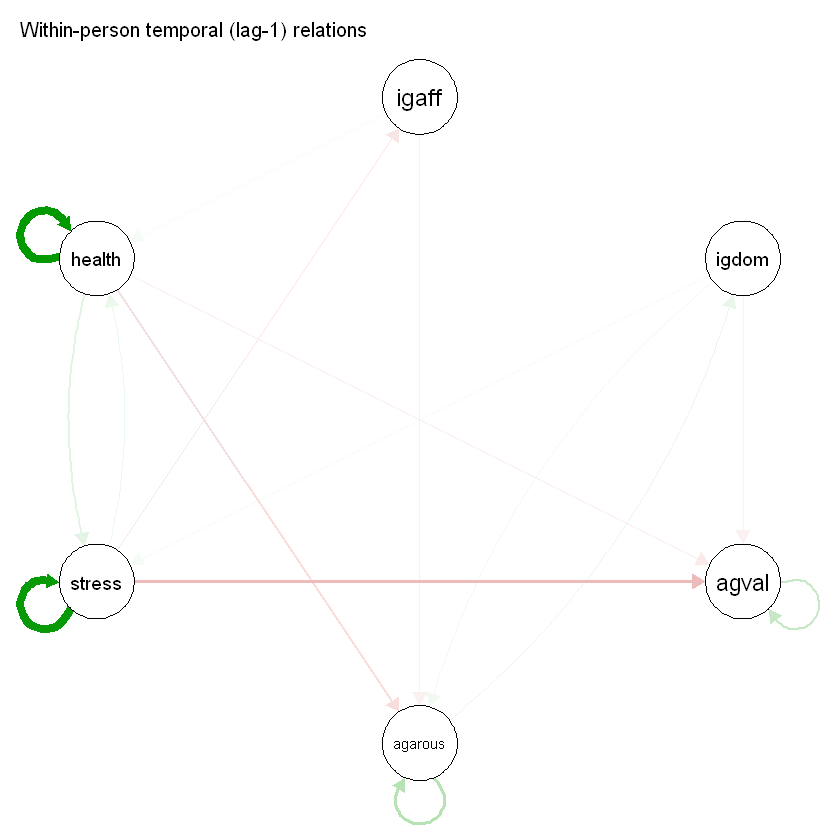

In [23]:
# Plot temporal relations:
plot(mlvar_all, "temporal", title = "Within-person temporal (lag-1) relations", layout = "circle", nonsig = "hide")

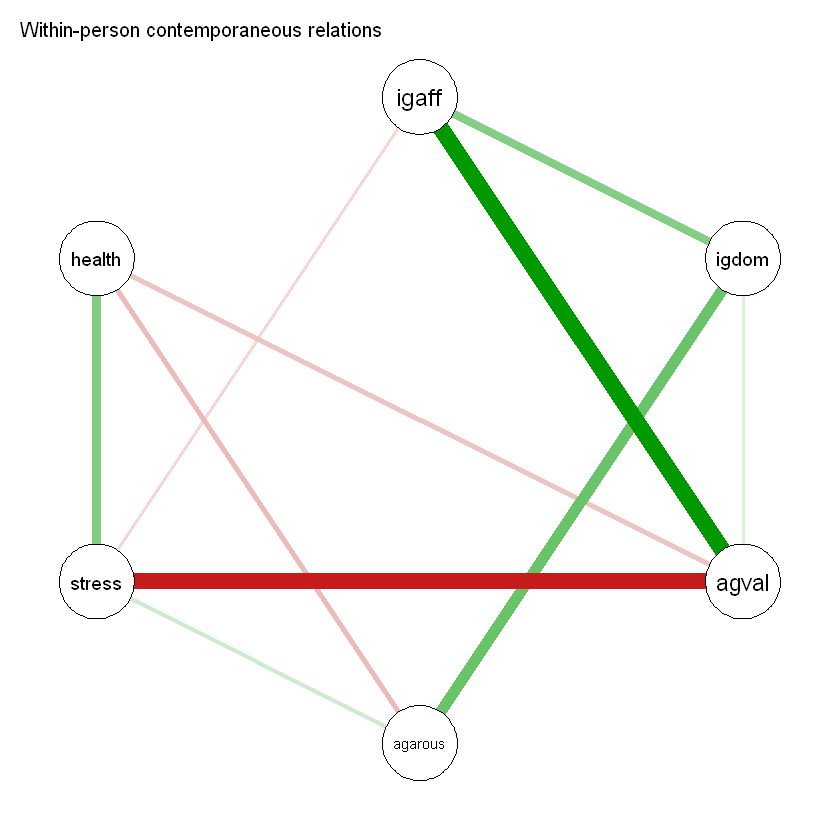

In [24]:
# Plot contemporaneous partial correlations:
plot(mlvar_all, "contemporaneous", title = "Within-person contemporaneous relations",
layout = "circle", nonsig = "hide")

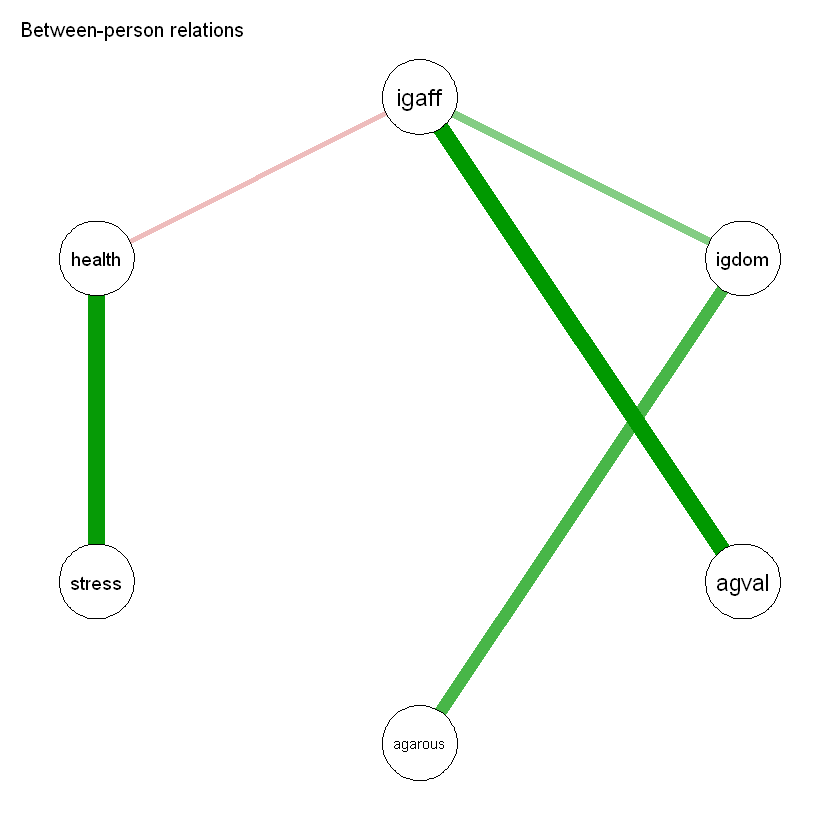

In [25]:
# Plot between-persons partial correlations:
plot(mlvar_all, "between", title = "Between-person relations", layout = "circle", nonsig = "hide")